# Nuvem de palavras
## Importação de bibliotecas

In [14]:
# -*- coding: utf-8 -*-
"""Cópia de stopwords-frequencia.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1vZ5M_pK7-urAVsJm3D4Q_m8_dvb2mENg

Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR

lucas.ferro.2000@hotmail.com

#Tokenização e normalização do corpus
"""

# prompt: converta um arquivo pdf em txt padrão utf-8

# !pip install PyPDF2
import nltk

# Instalação do NLTK
# !pip install nltk==3.6.2

# Importação de bibliotecas
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
from nltk.corpus import stopwords
nltk.download('punkt_tab')
import PyPDF2
import re

[nltk_data] Downloading package punkt_tab to /home/eba/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Convertendo .pdf para .txt


In [15]:

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Transforma .pdf em .txt
file = "aRevolucaoDosBichos"
PATH = "content/aRevolucaoDosBichos/"
reader = PyPDF2.PdfReader(""+PATH+""+file+".pdf")
qt = 0
last = 0

with open(PATH+"txt_cap1.txt",'w',encoding="utf-8") as txt_file:
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        text = page.extract_text()
        # verifica passagem de capítulo
        block = ["1","1","1","1"]
        result = ""
        ardb = open(PATH+"ardb.txt","a",encoding="utf-8")
        # ardb.write(text) # +"\n\n\n\n\n ------------------------------------------------------------------------ \n\n\n\n\n"
        for char in text:
            block[0] = block[1]
            block[1] = block[2]
            block[2] = block[3]
            block[3] = char
            # qt+=1
            # if (qt >= 14491) :
            # ardb.write(f"{block}\n")
            for num in range(1,11):
                if ((block[1] == f"{num}" and block[2] == "." and block[3] == "\n") or (block[1] == "1" and block[2] == "0" and block[3] == "." and num==10)):
                    if last>num:
                        break
                        pass
                    print(f"cap {num}: {block} : {last}")
                    last = num
                    txt_file = open(PATH+f"txt_cap{num}.txt","w",encoding="utf-8")
        txt_file.write(text)
#


# Example usage:
pdf_file_path = PATH+file+'.pdf'  # Replace with your PDF file path
txt_file_path = PATH+file+'output.txt'      # Replace with desired output file path

convert_pdf_to_txt(pdf_file_path, txt_file_path)


cap 1: ['1', '1', '.', '\n'] : 0
cap 2: ['1', '2', '.', '\n'] : 1
cap 3: ['1', '3', '.', '\n'] : 2
cap 4: ['1', '4', '.', '\n'] : 3
cap 5: ['1', '5', '.', '\n'] : 4
cap 6: ['1', '6', '.', '\n'] : 5
cap 7: ['1', '7', '.', '\n'] : 6
cap 8: ['1', '8', '.', '\n'] : 7
cap 9: ['1', '9', '.', '\n'] : 8
cap 10: ['1', '1', '0', '.'] : 9
PDF 'content/aRevolucaoDosBichos/aRevolucaoDosBichos.pdf' converted to 'content/aRevolucaoDosBichos/aRevolucaoDosBichosoutput.txt' successfully.


## Leitura e Remoção das palvras do .txt
#### Remoções de algumas preposições, verbos, advérbios desnecessários

In [16]:

# Pega todas as pontuações
remove_pt = string.punctuation
remove_pt

# Baixa as stopwords para o português no NLTK
nltk.download('stopwords')
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

stop_words_pt.add('ainda')
stop_words_pt.add('porém')
stop_words_pt

# from google.colab import drive
# drive.mount('/content/drive')
qt_palavras = 100
num = 7 # capítulo do livro

with open(PATH + f'txt_cap{num}.txt', 'r', encoding='utf8') as f:
    filecontent = f.read()

print(filecontent[0:])

type(filecontent)

len(filecontent) # número de tokens


7.
Aquele inverno foi horrível. Às tempestades seguiram-se
o granizo e as nevadas, depois o gelo, que só derreteu em
meados de fevereiro. Os bichos  zeram todo o possível na
reconstrução do moinho de vento, conscientes de que o
mundo tinha os olhos sobre eles e de que os invejosos seres
humanos vibrariam de contentamento se o moinho não fosse
concluído a tempo.
Apesar de tudo, os humanos recusaram-se a crer que
Bola-de-Neve tivesse destruído o moinho de vento: a rmavam
que as paredes ruíram porque eram  nas demais. Os animais
sabiam não ser essa a causa. Mesmo assim , deliberaram
dessa vez construir as paredes com noventa centímetros de
largura, em vez de quarenta e cinco, como inicialmente, o que
exigia muito mais pedra. Durante longo tempo, a pedreira
esteve coberta de neve e foi impossível fazer qualquer coisa.
Algum progresso se conseguiu depois, no tempo gelado e seco
que se seguiu, mas foi um trabalho cruel, e os animais já não
o realizavam com a mesma esperança de antes. Andavam

[nltk_data] Downloading package stopwords to /home/eba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


20126

## Organização das palavras e Tokenização

In [17]:

"""## Transformando o texto completo em sentenças (tokenizer do NLTK)"""

sentencas = []
for sentence in sent_tokenize(filecontent, language = 'portuguese'):
    sentencas.append(sentence)

sentencas

index = 1
for sentenca in sentencas[0:qt_palavras]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

"""## Segmentação por quebra de linha e depois pelo tokenizer do NLTK"""

sentencas_linha = []
for sentence in filecontent.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
            sentencas_linha.append(processed_sentence)

index = 1
for sentenca in sentencas_linha[0:qt_palavras]: # mostrando as 100 primeiras
    print(f'{index}: {sentenca}')
    index+=1

"""## Tokenização de cada sentença em palavras (tokenizer do NLTK)

"""

sentencas_tokenizadas = []

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='portuguese')
    sentencas_tokenizadas.append(tokenized_sentence)
index = 1
for tokens in sentencas_tokenizadas[0:qt_palavras]: # mostrando as 100 primeiras
    print(f'{index}: {tokens}')
    index+=1

"""## Pre-processamento dos elementos tokenizados
A ideia aqui é retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em minúsculos, retirar espaços e quebras de linhas adicionais desnecessários.
"""

from typing import TextIO
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [''.join(c for c in s if c not in remove_pt+'–'+'🙁'+'\’'+'\”'+"“") for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_pt] # stopwords
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)

index = 1
for texto in sent_tokenizada_preprocessed[0:qt_palavras]: # mostrando as qt_palavras primeiras
    print(f'{index}: {texto}')
    index+=1


1: 7.
2: Aquele inverno foi horrível.
3: Às tempestades seguiram-se
o granizo e as nevadas, depois o gelo, que só derreteu em
meados de fevereiro.
4: Os bichos  zeram todo o possível na
reconstrução do moinho de vento, conscientes de que o
mundo tinha os olhos sobre eles e de que os invejosos seres
humanos vibrariam de contentamento se o moinho não fosse
concluído a tempo.
5: Apesar de tudo, os humanos recusaram-se a crer que
Bola-de-Neve tivesse destruído o moinho de vento: a rmavam
que as paredes ruíram porque eram  nas demais.
6: Os animais
sabiam não ser essa a causa.
7: Mesmo assim , deliberaram
dessa vez construir as paredes com noventa centímetros de
largura, em vez de quarenta e cinco, como inicialmente, o que
exigia muito mais pedra.
8: Durante longo tempo, a pedreira
esteve coberta de neve e foi impossível fazer qualquer coisa.
9: Algum progresso se conseguiu depois, no tempo gelado e seco
que se seguiu, mas foi um trabalho cruel, e os animais já não
o realizavam com a mesma 

## Organização dos 'N'gramas

In [18]:

"""#NGramas"""

print(f"tokenizados: {len(sent_tokenizada_preprocessed)}")

import os
ngram_value = 1 # valor do ngrama
most_common_value = qt_palavras

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
index = 1
for n_gram in ngram_counts[0:most_common_value]: # mostrando as qt_palavras primeiras
    print(f'{index}: {n_gram}')
    index+=1

index = 1
for n_gram in flat_ngram_counts: # mostrando as qt_palavras primeiras
    print(f'{index}: {n_gram}')
    index+=1

len(ngram_list)

common

print(df_common)

# Quantidade de palavras
len(flat_ngram_counts)

# Quantidade de palavras únicas
len(ngram_list)


tokenizados: 495
1: [('inverno',), ('horrível',)]
2: [('tempestades',), ('seguiramse',)]
3: [('granizo',), ('nevadas',), ('gelo',), ('derreteu',)]
4: [('meados',), ('fevereiro',)]
5: [('bichos',), ('\x00zeram',), ('todo',), ('possível',)]
6: [('reconstrução',), ('moinho',), ('vento',), ('conscientes',)]
7: [('mundo',), ('olhos',), ('sobre',), ('invejosos',), ('seres',)]
8: [('humanos',), ('vibrariam',), ('contentamento',), ('moinho',)]
9: [('concluído',), ('tempo',)]
10: [('apesar',), ('tudo',), ('humanos',), ('recusaramse',), ('crer',)]
11: [('boladeneve',), ('destruído',), ('moinho',), ('vento',), ('a\x00rmavam',)]
12: [('paredes',), ('ruíram',), ('porque',), ('\x00nas',), ('demais',)]
13: [('animais',)]
14: [('sabiam',), ('causa',)]
15: [('assim',), ('deliberaram',)]
16: [('dessa',), ('vez',), ('construir',), ('paredes',), ('noventa',), ('centímetros',)]
17: [('largura',), ('vez',), ('quarenta',), ('cinco',), ('inicialmente',)]
18: [('exigia',), ('pedra',)]
19: [('durante',), ('long

1142

## Apresentação

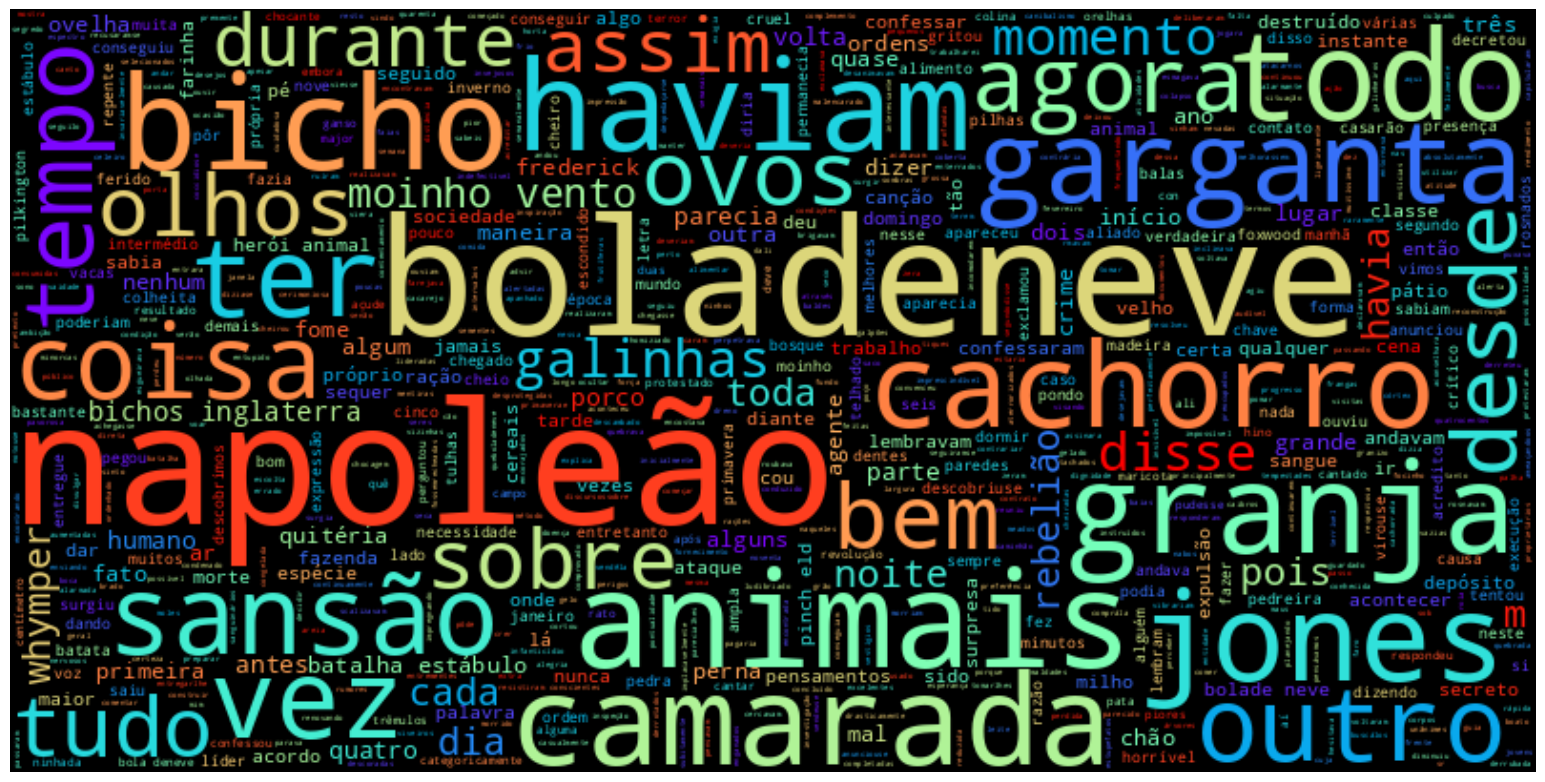

In [19]:
color = '#000000'
height = 400
width = 800
max_words = 2000
colormap = 'rainbow'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()